## Lec03. How to minimize cost

- 목표
  - cost function을 최소화하여 최종적으로 Linear regression 학습 완료하는지를 설명 

## 참조자료

- Andrew Ng의 ML 강의
  - https://class.coursera.org/ml-003/lecture
  - http://www.holehouse.org/mlclass/ (note)
- Convolutional Nerual Networks for visual recognition
  - http://cs231.github.io
- Tensorflow
  - https://www.tensorflow.org
  - https://github.com/anmericdamien/TensorFlow-Examples

## Hypothesis와 Cost

$ H(x) = Wx + b $

$ cost(W, b) = \frac{1}{m}\sum_{i=1}^{M}{(H^{(x^{(i)})}-y^{(i)})^2} $

- cost는 오차의 제곱의 평균
- 가설값과 실제 값을 차에 대한 제곱
- cost function을 최소화하는 W와 b를 데이터로 부터 구하는 것이 목표

## 가설 단순화

$ H(x) = Wx $

$ cost(W) = \frac{1}{m}\sum_{i=1}^{M}{(Wx^{(i)}-y^{(i)})^2} $

## Cost(W)는 어떻게 생긴것인가?

|x|y|
|---|---|
|1|1|
|2|2|
|3|3|

- W=1, cost(W)=?

In [55]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([1, 2, 3])

def hypothesis(w, feature):
    return w * feature

def cost(w, features, labels):
    harray = hypothesis(w, features)
    return sum(pow(harray-labels, 2)) / len(harray)   

In [56]:
cost(-1, x, y)

18.666666666666668

In [57]:
cost(0, x, y)

4.666666666666667

In [58]:
cost(1, x, y)

0.0

In [59]:
cost(2, x, y)

4.666666666666667

In [60]:
cost(3, x, y)

18.666666666666668

|w|cost|
|---|---|
|-1|18.67|
|0|4.67|
|1|0|
|2|4.67|

In [71]:
w_array = np.arange(-5., 5., 0.5)

In [77]:
def gen_costs(x, y):
    costs = []
    for w in w_array:
        lose = cost(w, x, y)
        costs.append(lose)

    return costs

costs = gen_costs(x, y)
costs

[168.0,
 141.16666666666666,
 116.66666666666667,
 94.5,
 74.666666666666671,
 57.166666666666664,
 42.0,
 29.166666666666668,
 18.666666666666668,
 10.5,
 4.666666666666667,
 1.1666666666666667,
 0.0,
 1.1666666666666667,
 4.666666666666667,
 10.5,
 18.666666666666668,
 29.166666666666668,
 42.0,
 57.166666666666664]

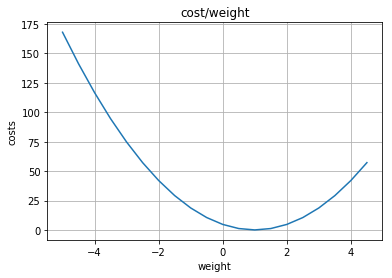

In [78]:
import matplotlib.pyplot as plt
import numpy as np
w = w_array
c = np.array(costs)
plt.plot(w, c)

plt.xlabel('weight')
plt.ylabel('costs')
plt.title('cost/weight')
plt.grid(True)
plt.show()

![](./images/06/cost_graph.jpg)

- cost의 최소값을 기계적으로 찾을 수 있어야 함

## Gradient Descent Algorithm

- 경사 하강법

- Cost function의 최소값을 찾음
- 다수의 Minimization 문제를 해결할 수 있음
- 예를 들어서 cost(W, b)에서 cost를 최소화하는 W, b를 찾는 것에 유용함
- 항이 2개 이상인 범용적인 함수에 적용 할 수 있음
  - cost(w1, w2, w3, w4, w5.....)

## Gradient Descent Algorithm의 작동 원리

- 경사가 완만해 지고 결국 0이 되는 지점을 점진적으로 찾아가는 방법

![](./images/06/gda.jpg)

- 초기 아무점에서 시작할 수 있음
- W, b를 약간 변경하여 다시 계산하고 cost(W, b)가 줄어드는지 확인
- 파라미터를 변경할 때 마다 경사도를 계산
- cost를 최소화는 경사도 확인
- 이 알고리듬을 사용하면 어쩐 점에서 시작하더라도 저점에 도달할 수 있음



## Formal definition

### cost 함수 단순화

#### 1차 단순화

$ cost(W) = \frac{1}{m}\sum_{i=1}^{M}{((Wx^{(i)})-y^{(i)})^2} $

#### 2차 단순화

$ cost(W) = \frac{1}{2m}\sum_{i=1}^{M}{((Wx^{(i)})-y^{(i)})^2} $

- cost 함수는 미분을 수행할 예정
- 분모를 없애기 위함
- 1/m의 미분이나 1/2m의 미분은 동일한 의미, 수식을 단순화
- Weight로 미분

$ W := W - \alpha \frac{\delta}{(\delta W)}cost(W)  $ 

- $\alpha$: Learning rate
- minus: 최소값을 구하기 위해서 방향을 반대로 함

$ W := W - \alpha \frac{\delta}{(\delta W)}\frac{1}{2m}\sum_{i=1}^{M}{((Wx^{(i)})-y^{(i)})^2}  $ 

$ W := W - \alpha \frac{1}{2m}\sum_{i=1}^{M}{2((Wx^{(i)})-y^{(i)})x^{(i)}}  $ 

$ W := W - \alpha \frac{1}{m}\sum_{i=1}^{M}{((Wx^{(i)})-y^{(i)})x^{(i)}}  $ 

- 여러번 실행하여 W를 업데이트하면서 W를 찾아감

## Gradient Descent Algorithm

__$ W := W - \alpha \frac{1}{m}\sum_{i=1}^{M}{((Wx^{(i)})-y^{(i)})x^{(i)}}  $ __

- 기계적으로 적용 가능

## Convex Function

![](./images/06/convex1.jpg)

- 시작점에 따라서 다른 값으로 귀결 될 수 있음

![](./images/06/convex2.jpg)

- cost function을 설계할때, Convex Function임을 확인해야 함
  - Convex Function은 어떤 값으로 시작하던지 동일한 값으로 귀결됨

## 최종 업데이트

In [84]:
import datetime
print(datetime.datetime.now())

2017-05-29 13:15:20.266747
